In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#loading data
df=pd.read_csv('../input/youtube-trending-videos-in-mediterranean-countries/youtube_trending_mediterranean.csv')
df.head()

,country,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,AL,hxWSp-8jJuo,DON XHONI - KATILE,2022-07-07T22:00:12Z,UCZNJXsf2I4y54M_UmMiC6Vw,DON XHONI,24,22.11.07,[none],5130167,3641,https://i.ytimg.com/vi/hxWSp-8jJuo/default.jpg,False,True,Stream or Download now ''KATILE'' ð https:/...
1,AL,MnrC9mk2H1o,Dhurata Dora x Elvana Gjata - GAJDE (Official ...,2022-06-30T22:00:11Z,UCtzhq8TIfFB9vRAHVqLL9PA,Dhurata Dora,10,22.11.07,[none],8886648,4414,https://i.ytimg.com/vi/MnrC9mk2H1o/default.jpg,False,True,The official video for GAJDE.Stream/Download G...
2,AL,5Ql-G0dTqC0,KIDA x BUTRINT IMERI - AM/PM,2022-07-02T22:00:11Z,UCAHVxL9FG3Sp8ltQtLEy_oA,KIDA,10,22.11.07,Butrint Imeri|Kida|Dale|Butrint imeri kida|But...,7230818,7518,https://i.ytimg.com/vi/5Ql-G0dTqC0/default.jpg,False,True,Stream or Download âAM/PMâ here ð§ https...
3,AL,oUdY0qSavvY,Dafina Zeqiri - Malli,2022-07-07T22:00:12Z,UCrv0PJoutcRhHkSMJYoXAIQ,Dafina Zeqiri,10,22.11.07,Dafina|Zeqiri|Dafine Moj|Pa ty|Lule Lule|Duro|...,1406078,827,https://i.ytimg.com/vi/oUdY0qSavvY/default.jpg,False,True,Bzzz Entertainment - https://lnk.to/BzzzStream...
4,AL,I4ZSvYLnOcQ,Tayna x Azet - Tequila,2022-06-30T18:00:26Z,UCJBZ-GcWSswmJ0xc9WAKDqw,Friends Entertainment,10,22.11.07,tayna|Friends|Entertainment|rinor hykolli|hip ...,6397676,6063,https://i.ytimg.com/vi/I4ZSvYLnOcQ/default.jpg,False,True,Stream âTequilaâ:https://taynaxazet.lnk.to...


In [2]:
#checking data types
df.dtypes

country              object
video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [3]:
# changing data type of upload date

a=pd.to_datetime(df['publishedAt'],format="%Y-%m-%d",exact=False)
df['Upload Date']=a.dt.date.astype('datetime64')
df['Upload Time']=a.dt.time


#changing data type of trending_date 

#df['trending_date']=df['trending_date'].astype('datetime64')



In [4]:
#droping unwanted columns
df=df.drop(columns=['publishedAt','tags','description','thumbnail_link'])
df.head()

,country,video_id,title,channelId,channelTitle,categoryId,trending_date,view_count,comment_count,comments_disabled,ratings_disabled,Upload Date,Upload Time
0,AL,hxWSp-8jJuo,DON XHONI - KATILE,UCZNJXsf2I4y54M_UmMiC6Vw,DON XHONI,24,22.11.07,5130167,3641,False,True,2022-07-07,22:00:12
1,AL,MnrC9mk2H1o,Dhurata Dora x Elvana Gjata - GAJDE (Official ...,UCtzhq8TIfFB9vRAHVqLL9PA,Dhurata Dora,10,22.11.07,8886648,4414,False,True,2022-06-30,22:00:11
2,AL,5Ql-G0dTqC0,KIDA x BUTRINT IMERI - AM/PM,UCAHVxL9FG3Sp8ltQtLEy_oA,KIDA,10,22.11.07,7230818,7518,False,True,2022-07-02,22:00:11
3,AL,oUdY0qSavvY,Dafina Zeqiri - Malli,UCrv0PJoutcRhHkSMJYoXAIQ,Dafina Zeqiri,10,22.11.07,1406078,827,False,True,2022-07-07,22:00:12
4,AL,I4ZSvYLnOcQ,Tayna x Azet - Tequila,UCJBZ-GcWSswmJ0xc9WAKDqw,Friends Entertainment,10,22.11.07,6397676,6063,False,True,2022-06-30,18:00:26


In [5]:
df.dtypes

country                      object
video_id                     object
title                        object
channelId                    object
channelTitle                 object
categoryId                    int64
trending_date                object
view_count                    int64
comment_count                 int64
comments_disabled              bool
ratings_disabled               bool
Upload Date          datetime64[ns]
Upload Time                  object
dtype: object

In [6]:
#converting treanding date to datetime data type 

df['trending_date']=df['trending_date'].astype('str')

df['trending_date']='20'+df['trending_date']

df['trending_date']=pd.to_datetime(df['trending_date'],format='%Y.%m.%d')
df['trending_date']=df['trending_date'].astype('datetime64')
df['trending_date']

0      2022-11-07
1      2022-11-07
2      2022-11-07
3      2022-11-07
4      2022-11-07
          ...    
3216   2022-11-07
3217   2022-11-07
3218   2022-11-07
3219   2022-11-07
3220   2022-11-07
Name: trending_date, Length: 3221, dtype: datetime64[ns]

In [7]:
#renaming columns into propper format
df.columns=['Country','Video Id','Title','Channel Id','Channel Title','Category Id','Trending Date','View Count','comment count','Comments Disabled','Ratings Disabled','Upload Date','Upload Time']

In [8]:
df

,Country,Video Id,Title,Channel Id,Channel Title,Category Id,Trending Date,View Count,comment count,Comments Disabled,Ratings Disabled,Upload Date,Upload Time
0,AL,hxWSp-8jJuo,DON XHONI - KATILE,UCZNJXsf2I4y54M_UmMiC6Vw,DON XHONI,24,2022-11-07,5130167,3641,False,True,2022-07-07,22:00:12
1,AL,MnrC9mk2H1o,Dhurata Dora x Elvana Gjata - GAJDE (Official ...,UCtzhq8TIfFB9vRAHVqLL9PA,Dhurata Dora,10,2022-11-07,8886648,4414,False,True,2022-06-30,22:00:11
2,AL,5Ql-G0dTqC0,KIDA x BUTRINT IMERI - AM/PM,UCAHVxL9FG3Sp8ltQtLEy_oA,KIDA,10,2022-11-07,7230818,7518,False,True,2022-07-02,22:00:11
3,AL,oUdY0qSavvY,Dafina Zeqiri - Malli,UCrv0PJoutcRhHkSMJYoXAIQ,Dafina Zeqiri,10,2022-11-07,1406078,827,False,True,2022-07-07,22:00:12
4,AL,I4ZSvYLnOcQ,Tayna x Azet - Tequila,UCJBZ-GcWSswmJ0xc9WAKDqw,Friends Entertainment,10,2022-11-07,6397676,6063,False,True,2022-06-30,18:00:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,NaN,eB-A1Y0Dswc,Thank you for watching,UCS5tt2z_DFvG7-39J3aE-bQ,Life of Boris,22,2022-11-07,864216,14431,False,True,2022-07-05,21:18:33
3217,NaN,KJGTtzccOHU,Pokemon Emerald but every battle is extremely ...,UC0VVYtw21rg2cokUystu2Dw,SmallAnt,20,2022-11-07,1311698,1232,False,True,2022-07-05,01:55:10
3218,NaN,be8mqaTi_DI,Victor Cibrian x Fuerza Regida x Luis R Conriq...,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2022-11-07,2256933,597,False,True,2022-07-04,21:00:36
3219,NaN,14aYHc7ybu0,WE STAYED AT A 1 STAR HOTEL FOR 24 HOURS | coc...,UCSGoIq_tVESqNYF1Re-zn1Q,HJ Evelyn,24,2022-11-07,922668,2951,False,True,2022-07-05,13:40:04


In [9]:
df['time taken trend']=df['Trending Date']-df['Upload Date']
df.head()

,Country,Video Id,Title,Channel Id,Channel Title,Category Id,Trending Date,View Count,comment count,Comments Disabled,Ratings Disabled,Upload Date,Upload Time,time taken trend
0,AL,hxWSp-8jJuo,DON XHONI - KATILE,UCZNJXsf2I4y54M_UmMiC6Vw,DON XHONI,24,2022-11-07,5130167,3641,False,True,2022-07-07,22:00:12,123 days
1,AL,MnrC9mk2H1o,Dhurata Dora x Elvana Gjata - GAJDE (Official ...,UCtzhq8TIfFB9vRAHVqLL9PA,Dhurata Dora,10,2022-11-07,8886648,4414,False,True,2022-06-30,22:00:11,130 days
2,AL,5Ql-G0dTqC0,KIDA x BUTRINT IMERI - AM/PM,UCAHVxL9FG3Sp8ltQtLEy_oA,KIDA,10,2022-11-07,7230818,7518,False,True,2022-07-02,22:00:11,128 days
3,AL,oUdY0qSavvY,Dafina Zeqiri - Malli,UCrv0PJoutcRhHkSMJYoXAIQ,Dafina Zeqiri,10,2022-11-07,1406078,827,False,True,2022-07-07,22:00:12,123 days
4,AL,I4ZSvYLnOcQ,Tayna x Azet - Tequila,UCJBZ-GcWSswmJ0xc9WAKDqw,Friends Entertainment,10,2022-11-07,6397676,6063,False,True,2022-06-30,18:00:26,130 days


In [10]:
# min time taken for vedio to treand
print((df['Trending Date']-df['Upload Date']).min())

# max time taken for vedio to treand
print((df['Trending Date']-df['Upload Date']).max())


120 days 00:00:00
156 days 00:00:00


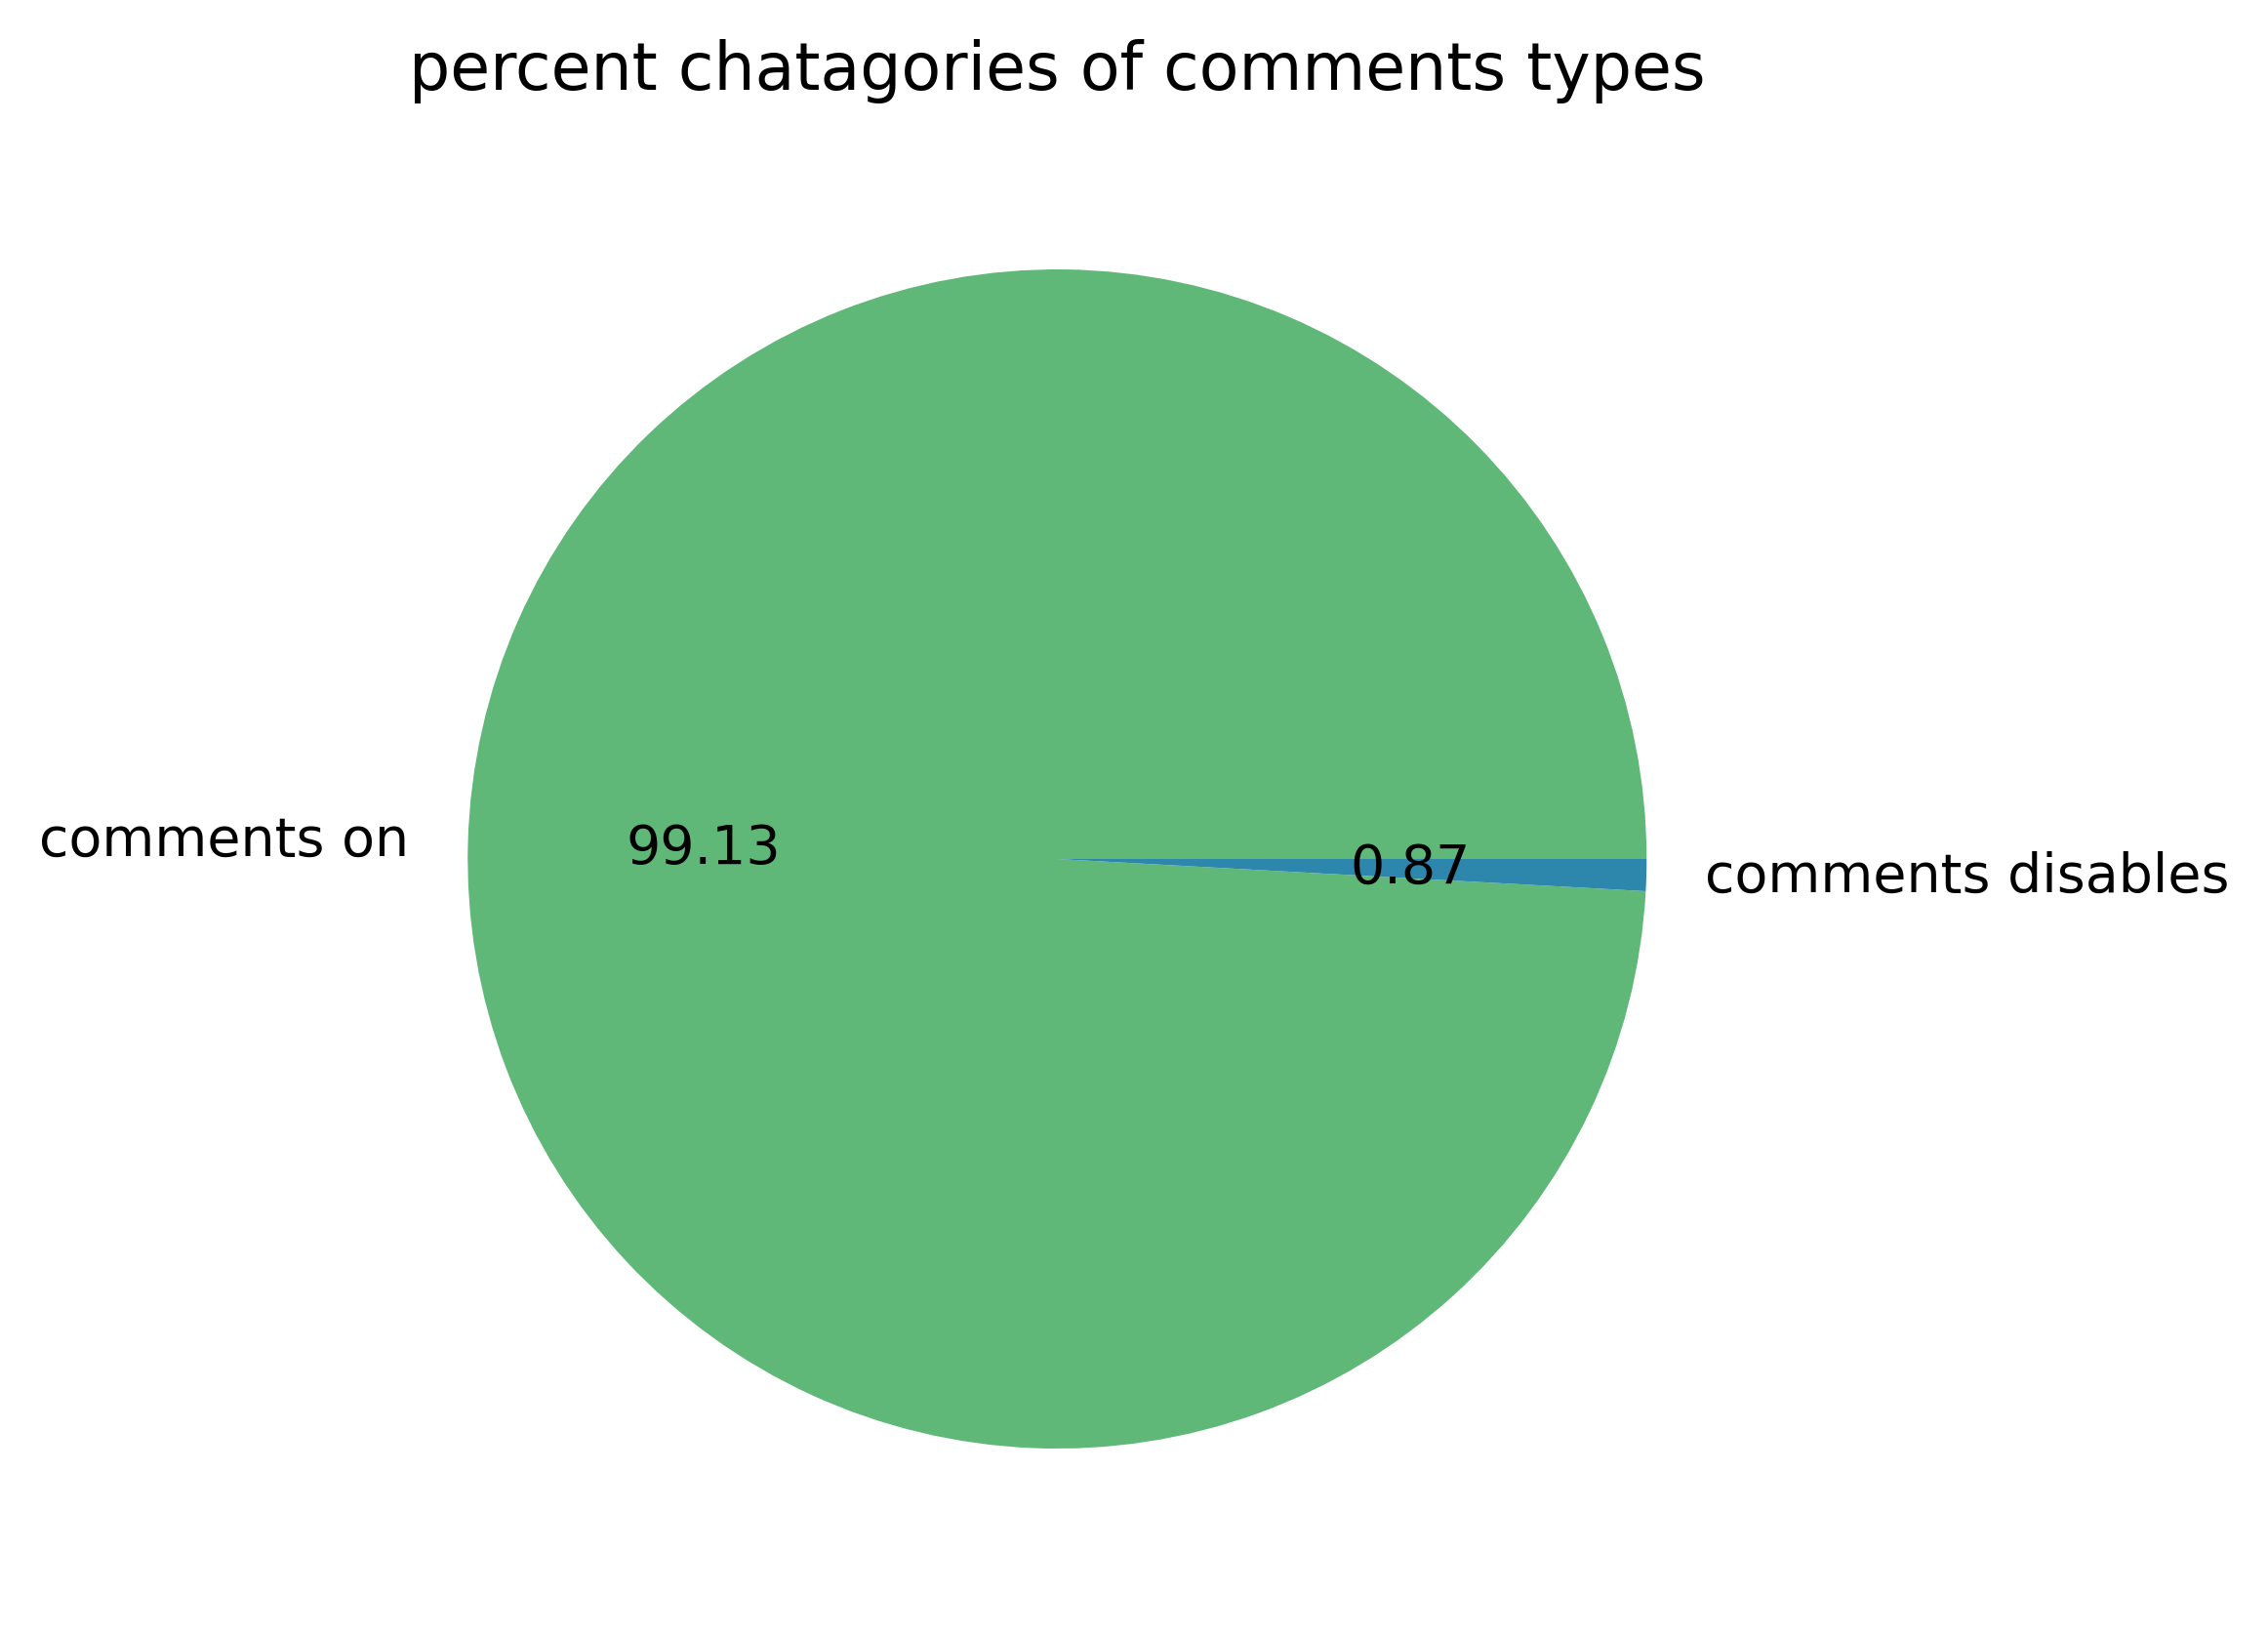

In [11]:
a=df['Comments Disabled'].value_counts()
plt.figure(figsize=(10,5),dpi=400)
colors=['#5fb877','#2d87ad']
labels=['comments on','comments disables']
plt.pie(a,labels=labels,colors=colors,autopct='%.2f')
plt.title('percent chatagories of comments types')
plt.show()


In [12]:
df['Ratings Disabled'].value_counts()

True    3221
Name: Ratings Disabled, dtype: int64

In [13]:
for i in df.columns:
    print(i,'-',df[i].isnull().mean())

Country - 0.06209251785159888
Video Id - 0.0
Title - 0.0
Channel Id - 0.0
Channel Title - 0.0
Category Id - 0.0
Trending Date - 0.0
View Count - 0.0
comment count - 0.0
Comments Disabled - 0.0
Ratings Disabled - 0.0
Upload Date - 0.0
Upload Time - 0.0
time taken trend - 0.0


In [14]:
df1=df.groupby(['Country'])


In [15]:
#contries and respective no of trending vedios
df1['Country'].value_counts()

Country  Country
AL       AL         117
BA       BA         113
CY       CY         180
DZ       DZ         200
EG       EG         200
ES       ES         134
FR       FR         200
GR       GR         127
HR       HR         138
IL       IL         149
IT       IT         124
LB       LB         200
LY       LY         200
MA       MA         200
ME       ME         104
MT       MT         127
SI       SI         163
TN       TN         200
TR       TR         145
Name: Country, dtype: int64

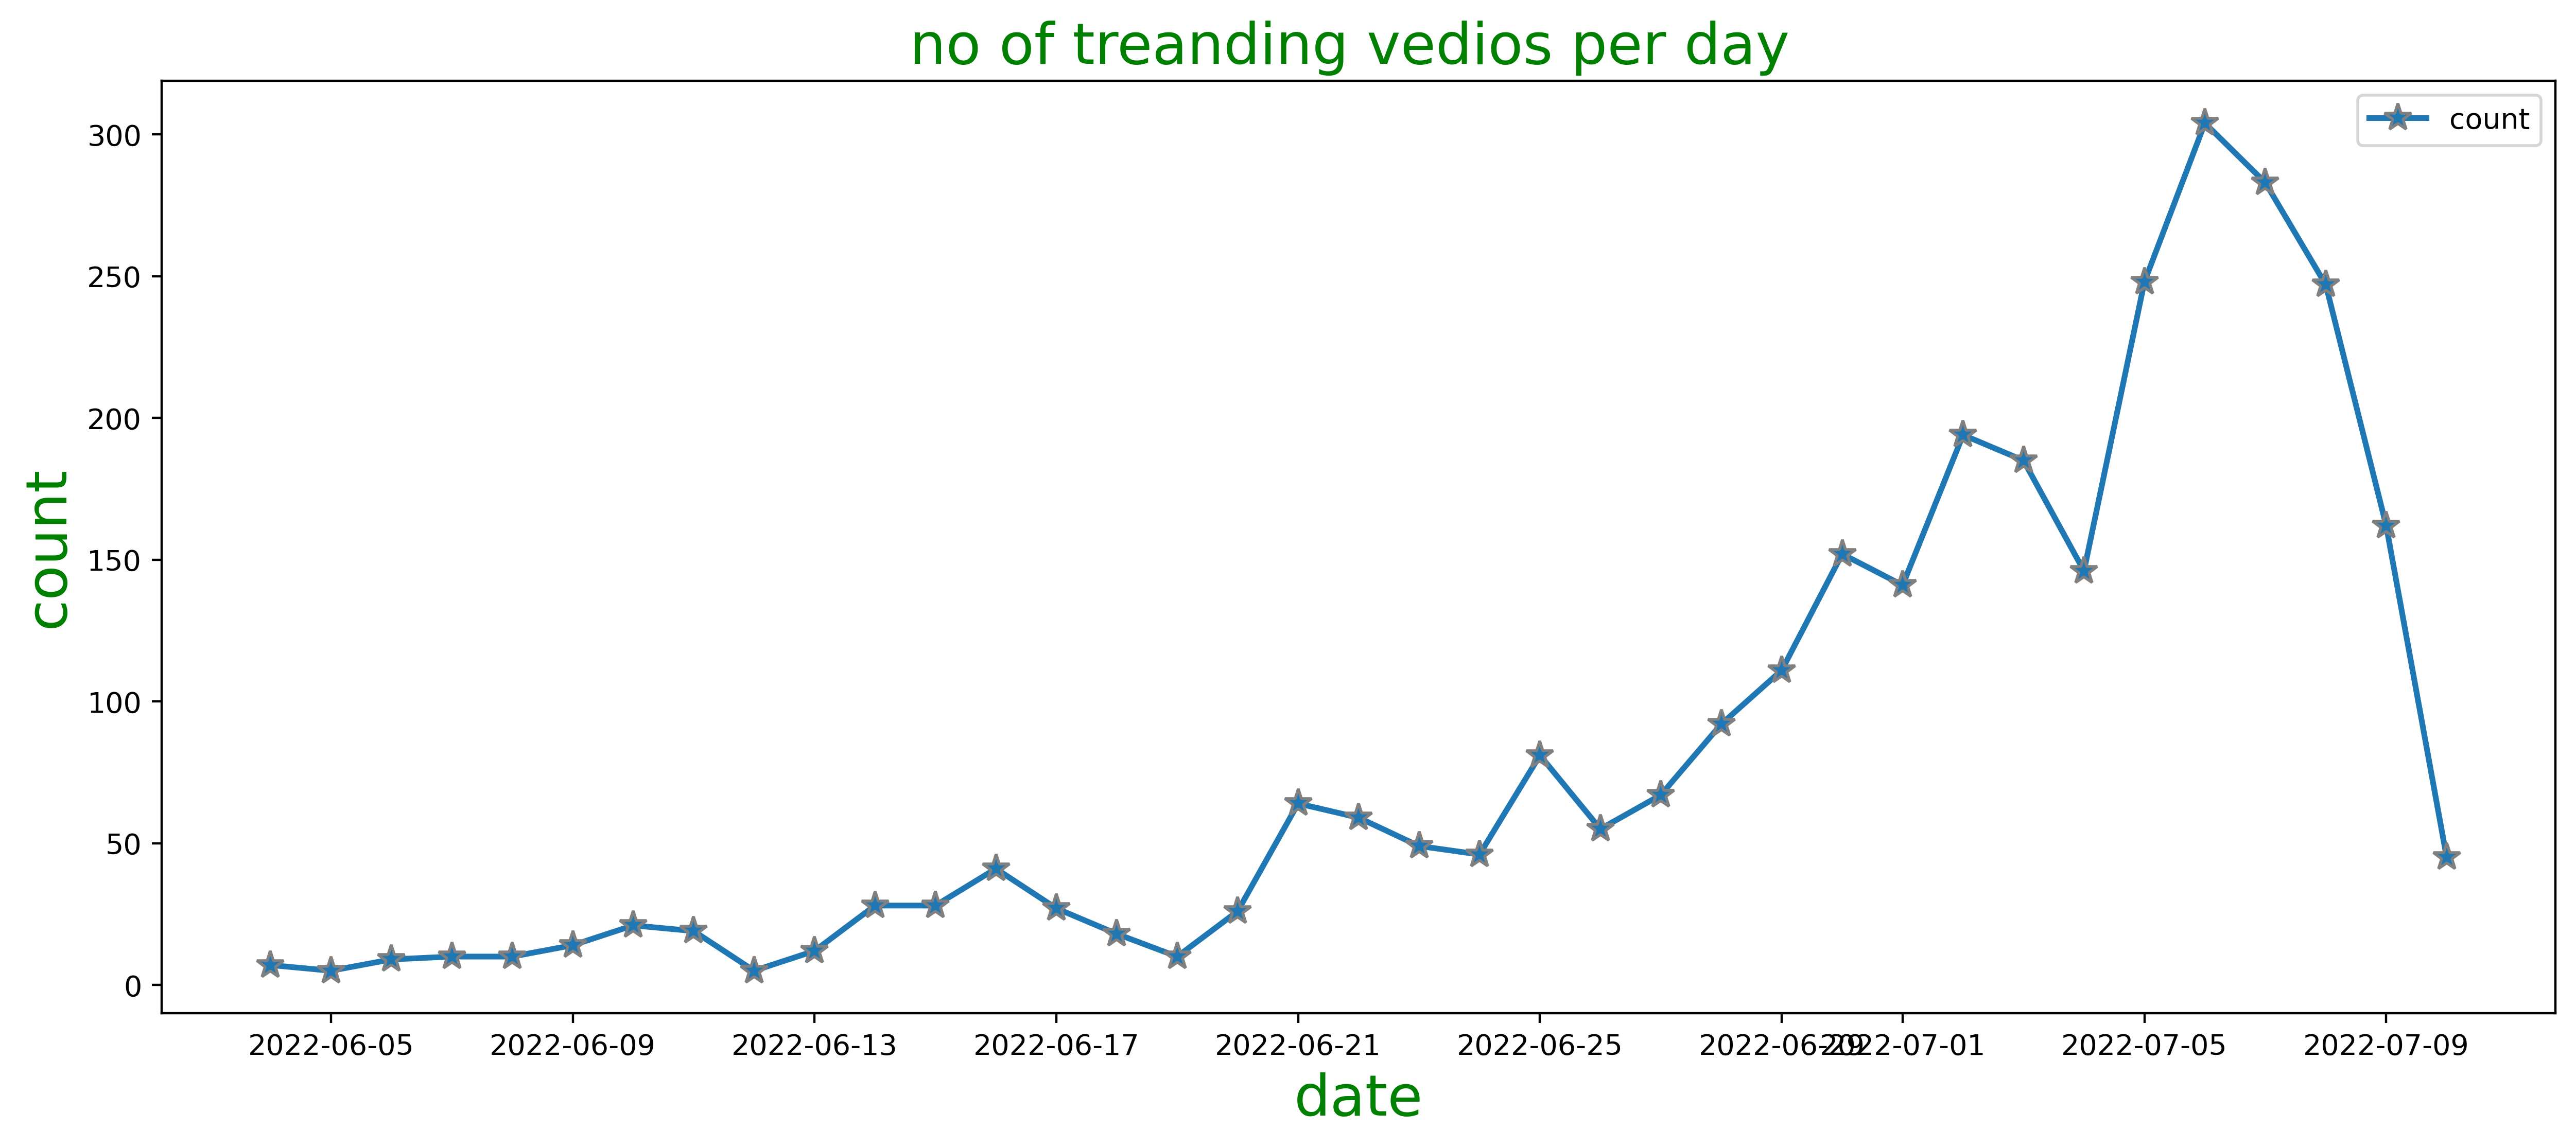

In [16]:
#genrating time vs no vedios graph
a=df.groupby(['Upload Date'])['Country'].count()

b=[0 for x in range(len(a))]
for i in range(len(a)):
    b[i]=a[i]
    
date=df.sort_values('Upload Date')['Upload Date'].unique()

plt.figure(figsize=(15,6),dpi=400)
#plt.style.use('ggplot')

plt.plot(date,b,label='count',linewidth=2,marker='*',markersize=10,markeredgecolor='gray')
plt.title('no of treanding vedios per day ',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})
plt.ylabel('count',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})
plt.xlabel('date',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})

plt.legend()
plt.show()




In [17]:
#chanels  and their respective trendingd vedios view count
a=df.groupby(['Channel Title'])['View Count'].sum()
a

Channel Title
 Ø±ÙØ¨ - POWR ROB                                     1204648
20th Century Studios                                   4737895
24 minuta sa Zoranom KesiÄem - ZvaniÄni kanal         787388
2J                                                      510808
2MTV                                                    562093
                                                        ...   
ÙÙÙ
ÙØ§Øª Ø­Ù
Ø¯Ù ÙÙÙØ§Ø¡                      33266221
ÙÙÙ
ÙØ§Øª Ø¹ÙØ´Ø© ÙØ¨ÙØ§ØªÙØ§ð¥´                537264
ÙÙÙ
ÙØ§Øª ÙØ§Ø­Ø¯ Ø¹Ø±Ø§ÙÙ | One Iraqi Diary     5095620
å¨æ°å« Jay Chou                                    22771772
ðªð¬Ø¬Ø²Ø§Ø¦Ø±ÙØ© ÙÙ Ù
ØµØ±ð©ð¿              251831
Name: View Count, Length: 1344, dtype: int64

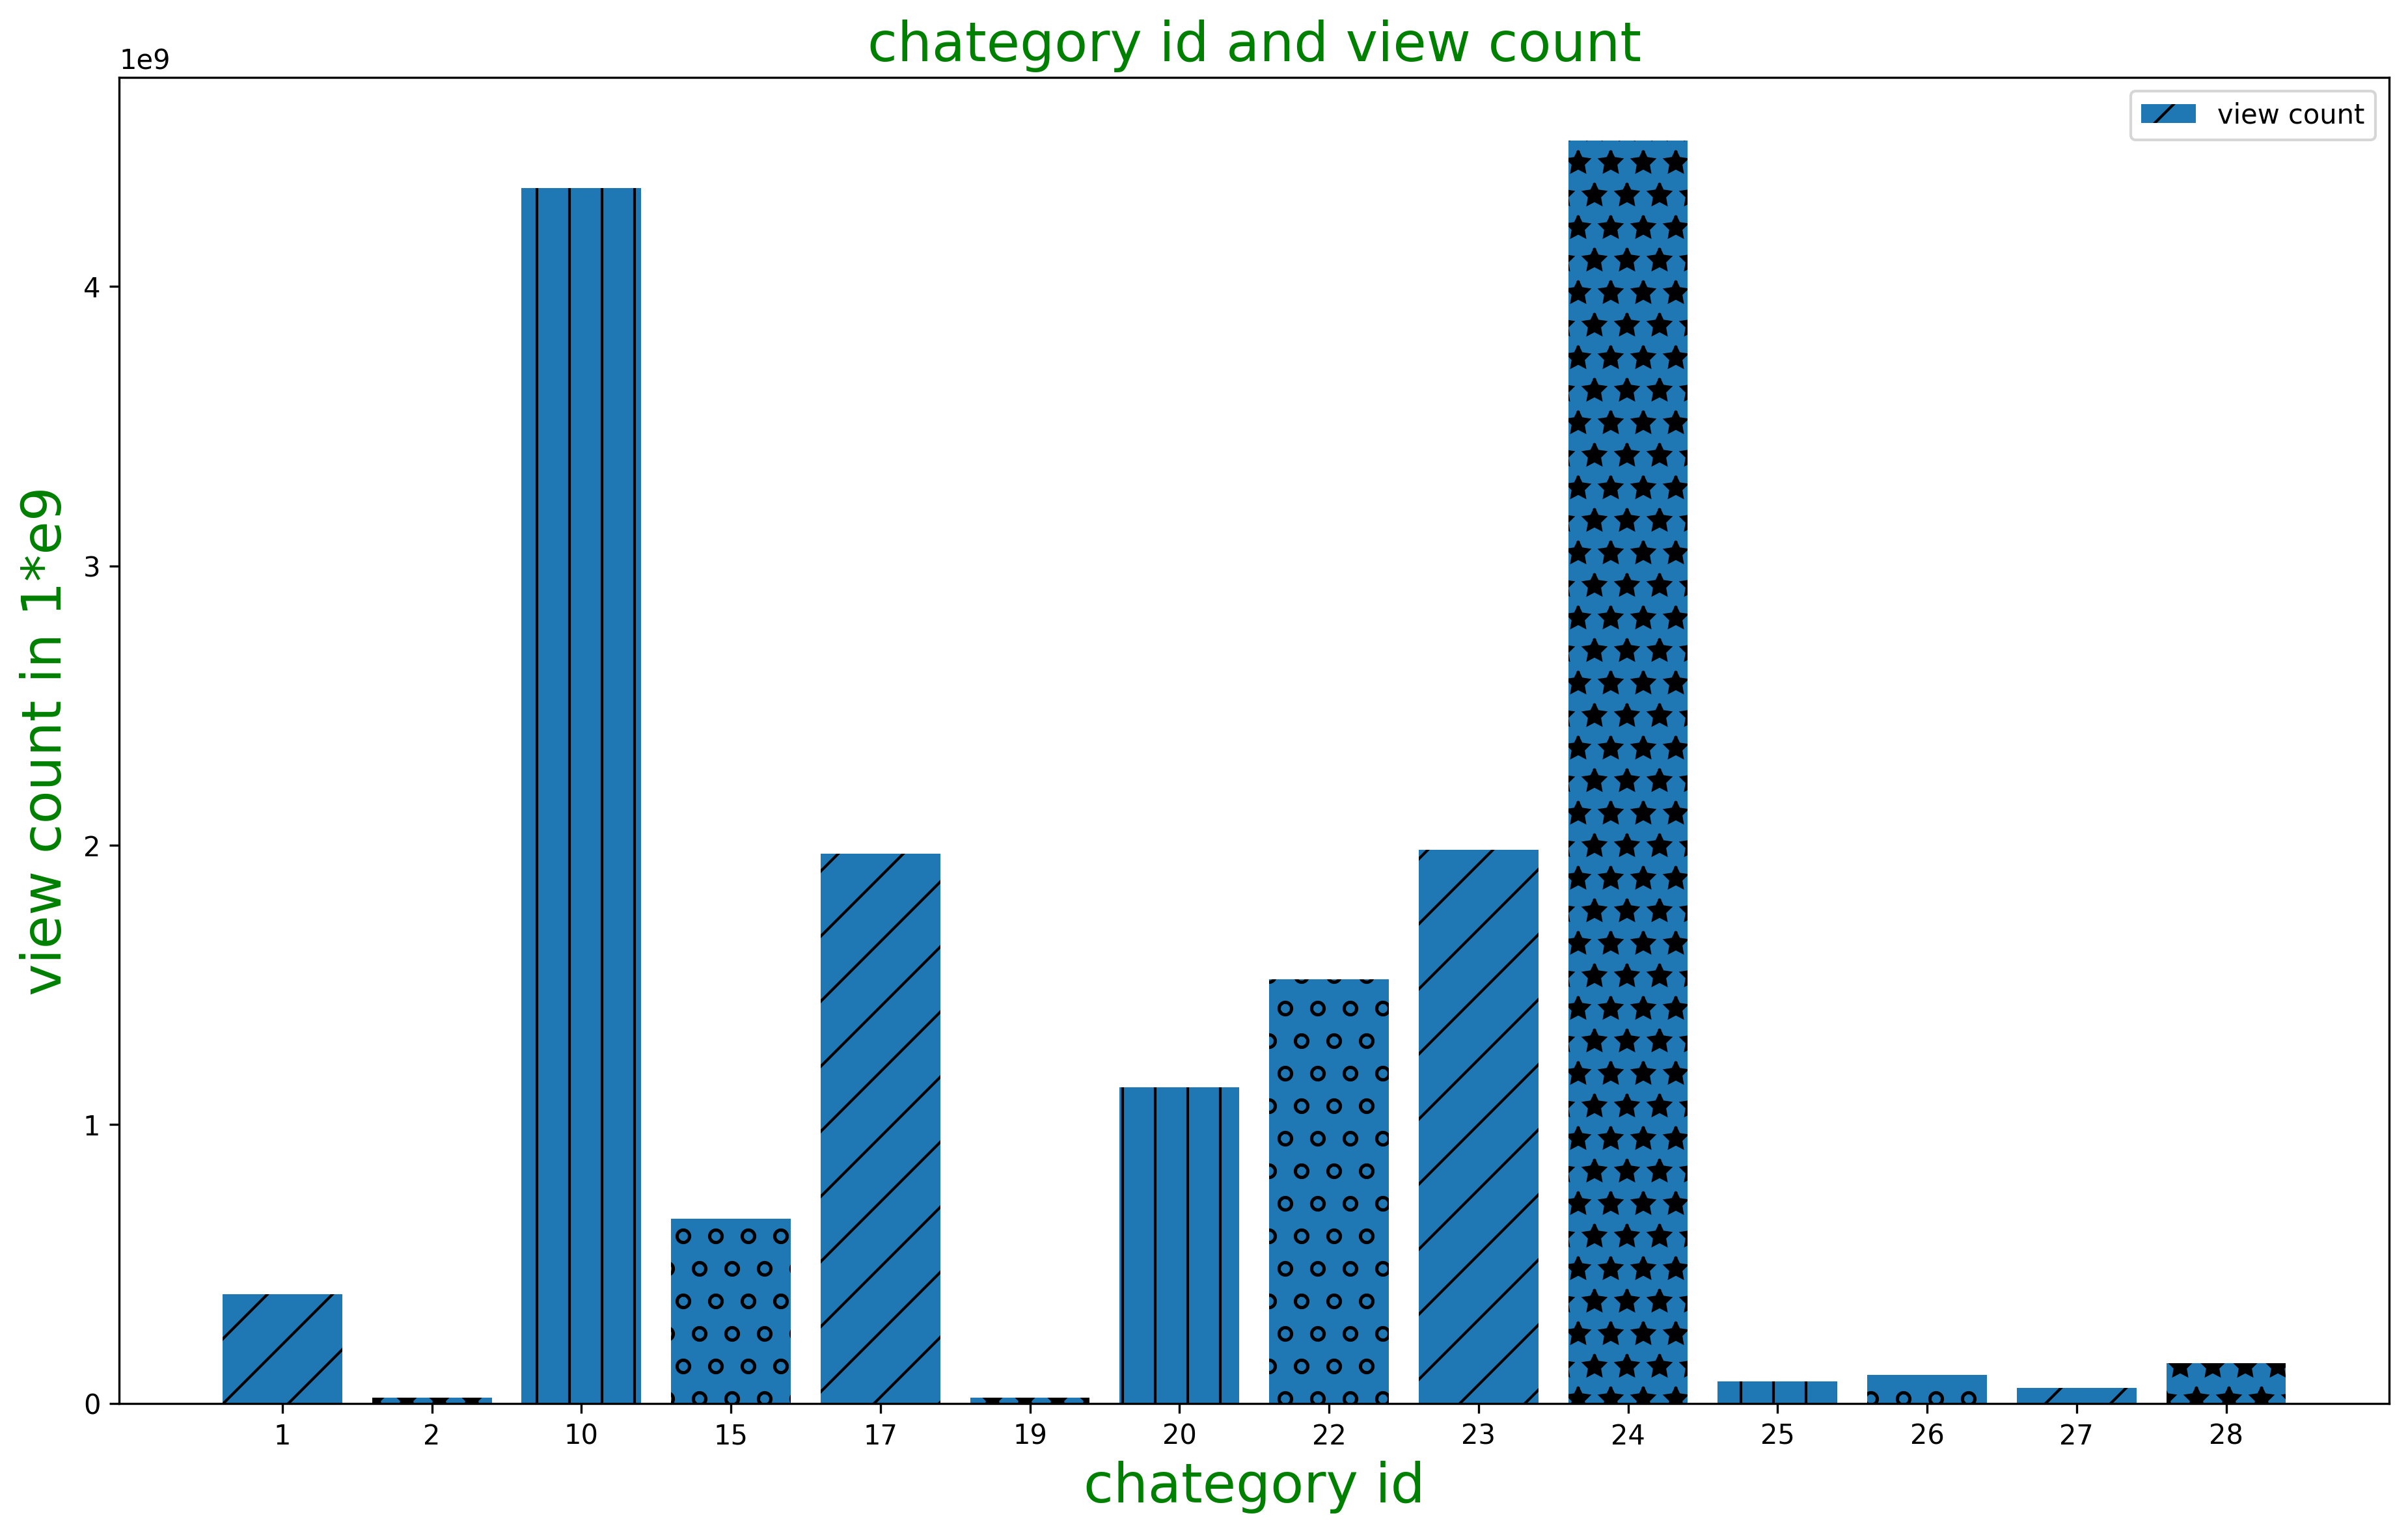

In [18]:
#barplot brtween  chategort id and number of view count
df=df.sort_values('Category Id')
a=df['Category Id'].unique()

a=a.astype('str')

b=df.groupby(['Category Id'])['View Count'].sum()

plt.figure(figsize=(15,9),dpi=300)

bar=plt.bar(a,b,label='view count')


plt.title('chategory id and view count',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})
plt.xlabel('chategory id',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})
plt.ylabel('view count in 1*e9',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})

hatch=['/','*','|','o','/','*','|','o','/','*','|','o','/','*']
for i in bar:
  i.set_hatch(hatch.pop(0))

plt.legend()
plt.show()

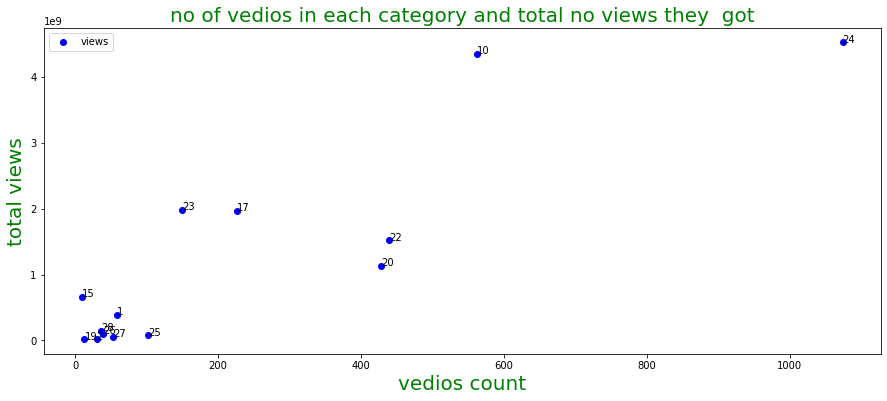

In [19]:
#scatterplot between count of veios of chatogry and no of views of chategory
a=df.groupby(['Category Id']).count().max(axis=1)
b=[0 for i in a]
h=0
for i in a:
    b[h]=i
    h=h+1
b# count of vedios

c=df.groupby(['Category Id'])['View Count'].sum().reset_index(drop=True)#no of views


d=df['Category Id'].unique()
d=d.astype('str')

plt.figure(figsize=(15,6))
#print(len(b),len(c),len(d))

plt.scatter(b,c,color='blue',label='views',marker='o')

plt.title('no of vedios in each category and total no views they  got',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})
plt.xlabel('vedios count',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})
plt.ylabel('total views',fontdict={'fontsize':20,'fontname':'Times New Roman','color':'green'})

for i, j in enumerate(d):
    plt.annotate(j, (b[i], c[i]))
    
#lt.annotate('6',(b[0]c[0])) does not work  there is no 0,0 index in scaterplot
#print(d)

   # print(i,type(label)
#plt.annotate('g',(b[2],c[2]))

plt.legend()
plt.show()
